In [11]:
import pandas as pd
from tqdm import tqdm
from vincenty import vincenty
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans
from numpy import vstack,array
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten, kmeans,vq
from itertools import combinations
import networkx as nx

In [2]:
df = pd.read_csv('dataset/dataset.csv')
df.head()

id                 name        lat        lon locality  \
0  50988380961  Late winter 2020-21  60.449969  22.265006    Turku   
1  50988488177  Late winter 2020-21  60.449969  22.265006    Turku   
2  50988380816  Late winter 2020-21  60.449969  22.265006    Turku   
3  50988380741  Late winter 2020-21  60.449969  22.265006    Turku   
4  50988487997  Late winter 2020-21  60.449969  22.265006    Turku   

           region neighbourhood  
0  Finland Proper         Turku  
1  Finland Proper         Turku  
2  Finland Proper         Turku  
3  Finland Proper         Turku  
4  Finland Proper         Turku

In [3]:
df = df.groupby(['lon','lat']).size().reset_index().rename(columns={0:'count'})

In [4]:
coords = df[["lat", "lon"]].values

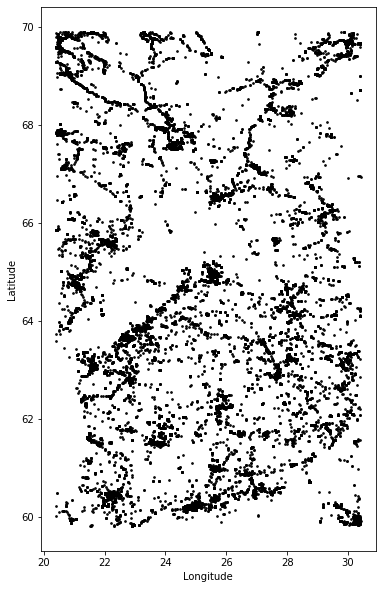

In [5]:
fig, ax = plt.subplots(figsize=[6, 10])
df_scatter = ax.scatter(df['lon'], df['lat'], c='k', alpha=0.9, s=3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

C:\Users\blazhko\Anaconda3\envs\cn\lib\site-packages\scipy\cluster\vq.py:575: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


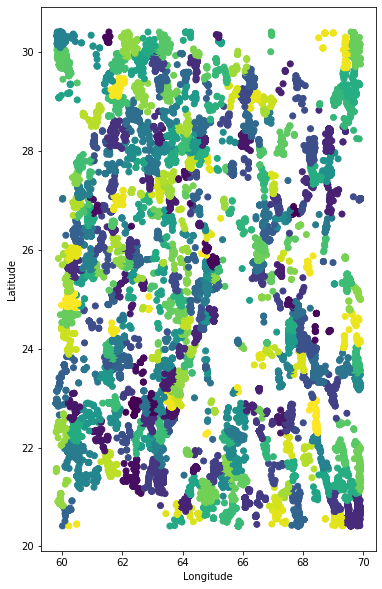

In [6]:
nodes, colors = kmeans2(coords, 500, iter = 20)  

fig, ax = plt.subplots(figsize=[6, 10])
df_scatter = ax.scatter(coords[:,0], coords[:,1], c=colors);
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


In [89]:
centroids, colors = kmeans(coords, 500)
idx,_ = vq(coords, centroids)

In [64]:
max(np.bincount(idx))

648

In [90]:
centroids_df = pd.DataFrame(centroids, columns=['lat', 'lon'])
centroids_df['size'] = np.bincount(idx)
centroids_df.to_csv('dataset/cluster_centers.csv', index=True)
centroids_df.head()

lat        lon  size
0  69.812222  21.114398   125
1  69.676954  30.375062    40
2  59.937396  30.376444   109
3  65.006890  25.484819    86
4  64.755115  20.933671   182

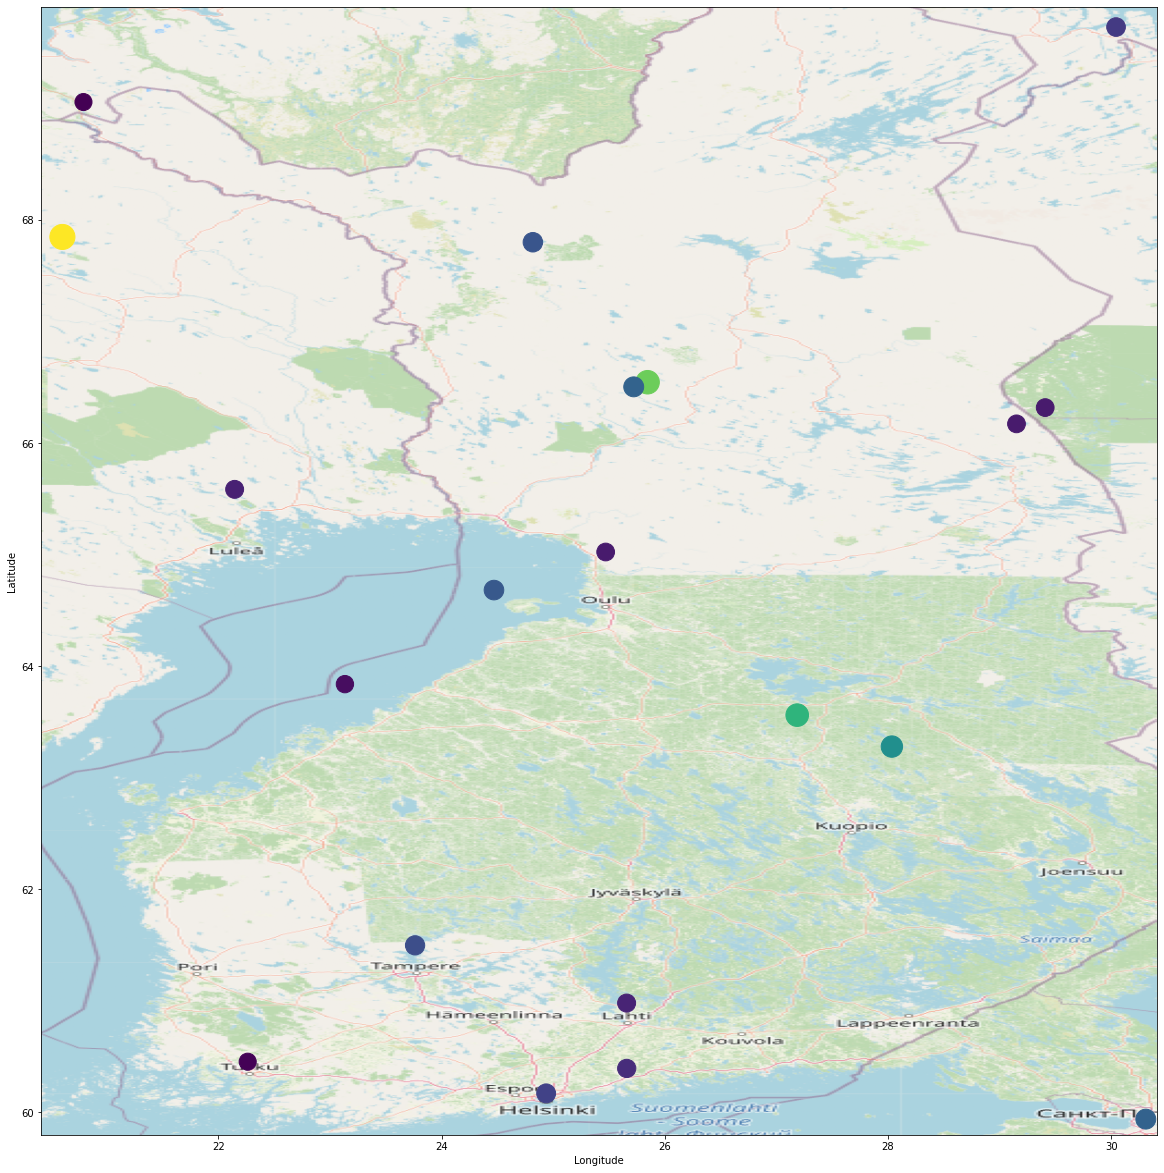

In [91]:
img = plt.imread('map.png')
bbox = (20.410, 30.410, 59.800, 69.910)

sorted_df = centroids_df.sort_values(by=['size'], ascending=False)
sorted_df=sorted_df.head(20)
x = sorted_df['lon']
y = sorted_df['lat']
s = sorted_df['size']

fig, ax = plt.subplots(figsize=[20, 30])
df_scatter = ax.scatter(x, y, s=s, c=s, cmap=plt.cm.viridis, zorder=1)
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(img, zorder=0, extent = bbox, aspect= 'equal')

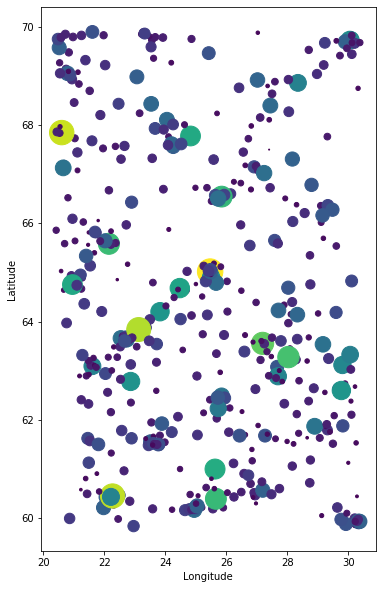

In [73]:
x = centroids_df['lon']
y = centroids_df['lat']
s = centroids_df['size']

fig, ax = plt.subplots(figsize=[6, 10])
df_scatter = ax.scatter(x, y, s=s, c=s, cmap=plt.cm.viridis);
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [13]:
distances = pd.DataFrame(columns=['source', 'destination', 'v_distance'])


In [14]:
distances = pd.DataFrame(columns=['source', 'destination', 'v_distance'])

for combo in tqdm(combinations(nodes_df[["id", "lat", "lon"]].values, 2)):
    node0 = combo[0]
    node1 = combo[1]
    s = (float(node0[1]), float(node0[2]))
    d = (float(node1[1]), float(node1[2]))
    v = vincenty(s, d)
    new_row = {'source': node0[0], 'destination': node1[0], 'v_distance': v}
    distances = distances.append(new_row, ignore_index=True)
    
    
    

KeyError: "['id'] not in index"

In [10]:
distances.head()

source  destination   v_distance
0     0.0          1.0   197.838625
1     0.0          2.0    56.683180
2     0.0          3.0   192.816840
3     0.0          4.0  1067.990449
4     0.0          5.0   235.588556

In [11]:
distances.to_csv('dataset/distances.csv', index=False)

In [24]:
G = nx.Graph()

for n in tqdm(nodes_df.iterrows()):
    G.add_node(n[0], pos=(n[1]['lat'], n[1]['lon']))

500it [00:00, 26563.04it/s]


In [1]:
T = nx.minimum_spanning_tree(G)

NameError: name 'nx' is not defined

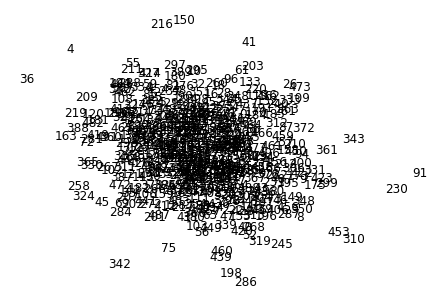

In [25]:
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=0)


In [28]:
for combo in tqdm(combinations(G.nodes, 2)):
    node0 = combo[0]
    node1 = combo[1]
    G.add_edge(node0, node1)
    
    
    

124750it [00:00, 859817.60it/s]


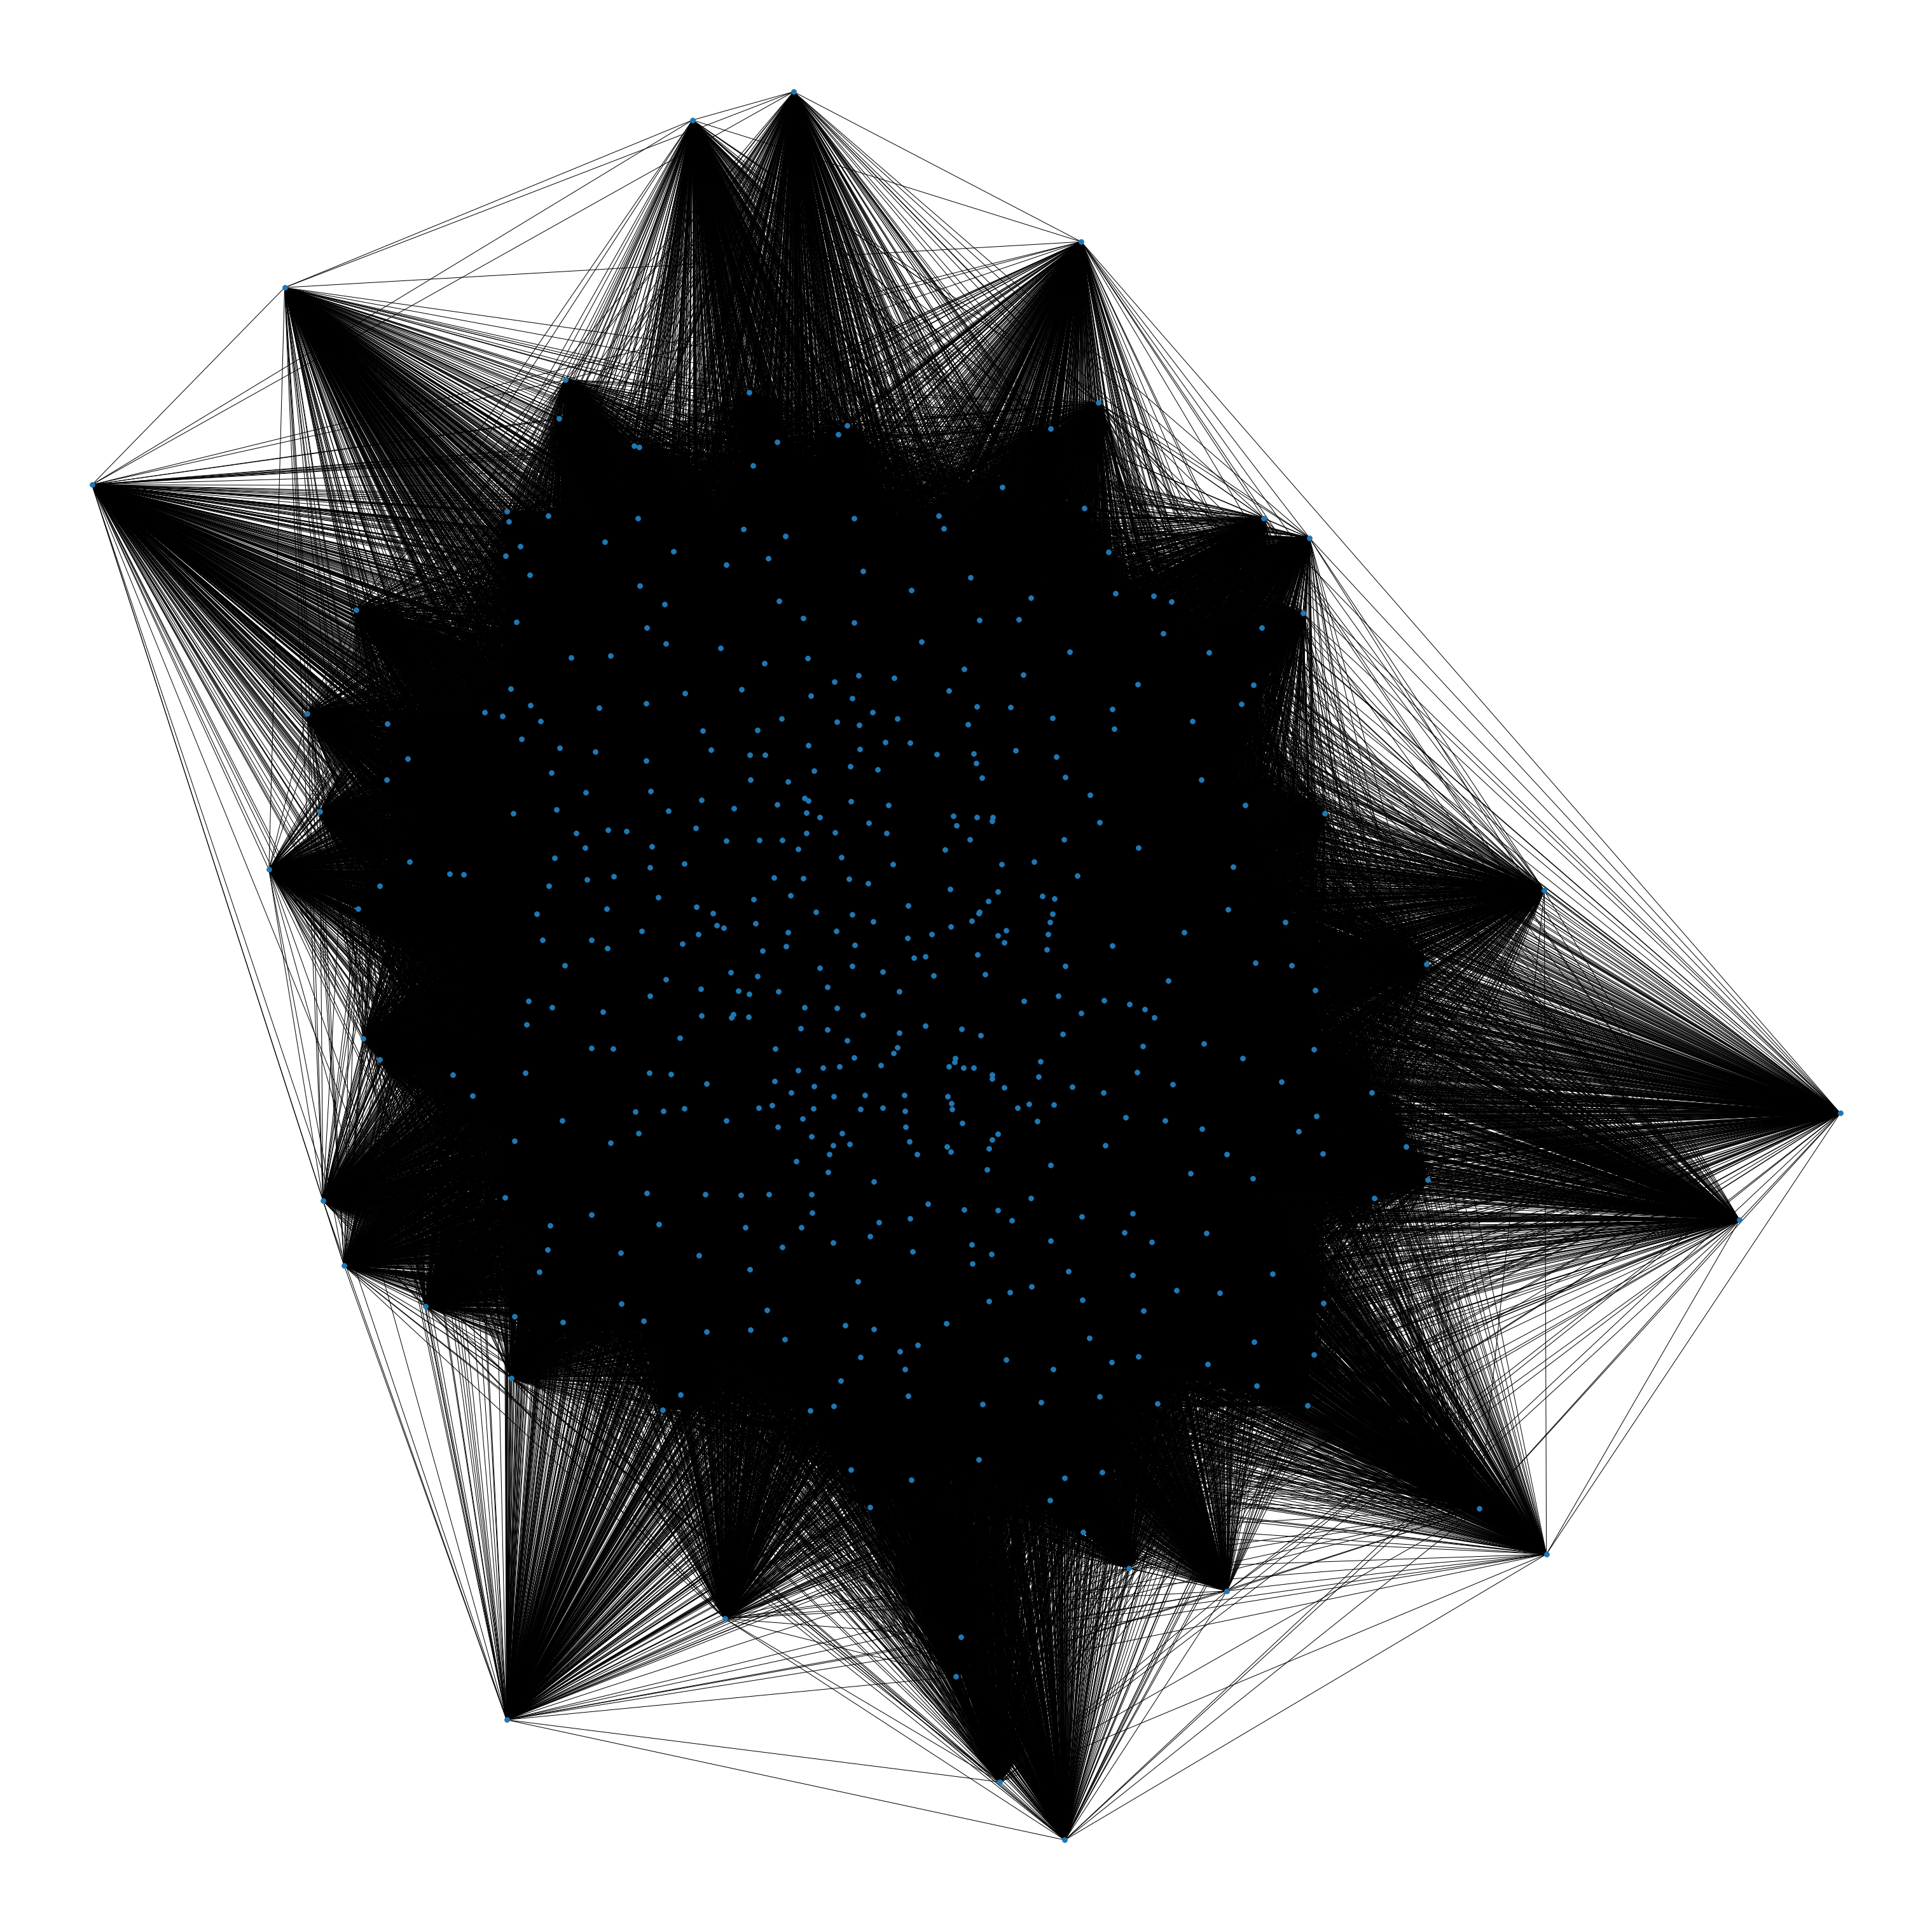

In [33]:
plt.figure(figsize=(42,42))
nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=60)
plt.show()